**Data Exploration**

This notebook explores historical market data that will be used for
Monte Carlo portfolio risk analysis. We focus on price dynamics and
log-returns, which form the basis of subsequent modeling.

In [7]:
%pip install yfinance
%pip install pandas-datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
from datetime import datetime

plt.style.use("seaborn")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
import yfinance as yf
import numpy as np

raw = yf.download(
    ["IBM", "GOOG"],
    start="2007-07-01",
    end="2013-06-30",
    auto_adjust=True
)

S = raw["Close"]
S.head()

[*********************100%***********************]  2 of 2 completed


Ticker,GOOG,IBM
Date,,
2007-07-02,13.111647,55.284412
2007-07-03,13.209543,56.110962
2007-07-05,13.389760,56.884865
2007-07-06,13.334631,57.400810
2007-07-09,13.412751,57.369251


We use daily adjusted closing prices downloaded from Yahoo Finance.
Adjusted prices are required to ensure consistency over time.

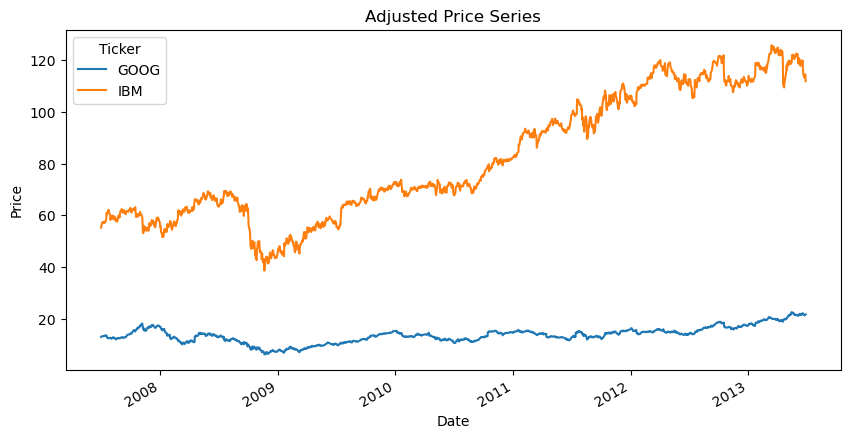

In [23]:
import matplotlib.pyplot as plt
S.plot(figsize=(10,5))
plt.title("Adjusted Price Series")
plt.ylabel("Price")
plt.show()


The figure shows the historical price evolution of the selected assets.
Prices exhibit clear trends and non-stationary behavior.
Therefore, prices themselves are not suitable for direct statistical modeling.

In [20]:
log_returns = np.log(S / S.shift(1)).dropna()
log_returns.head()

Ticker,GOOG,IBM
Date,,
2007-07-03,0.007439,0.014840
2007-07-05,0.013551,0.013698
2007-07-06,-0.004126,0.009029
2007-07-09,0.005841,-0.000550
2007-07-10,0.001437,-0.003125


To remove trends and achieve stationarity, we work with log-returns defined as

r_t = log(S_t / S_{t-1})

Log-returns are additive over time and commonly used in financial modeling.


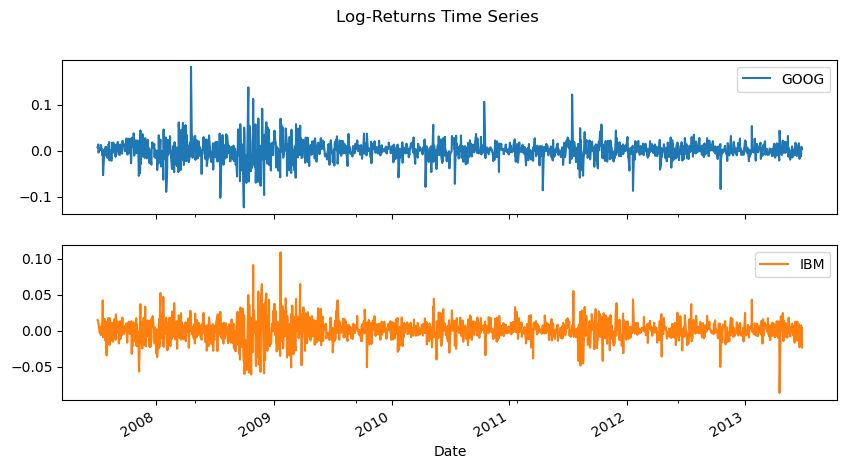

In [24]:
log_returns.plot(subplots=True, figsize=(10,5), sharex=True)
plt.suptitle("Log-Returns Time Series")
plt.show()

In [ ]:
The log-returns fluctuate around zero and appear more stationary than prices.
Periods of high volatility followed by calm periods can be observed,
indicating volatility clustering.

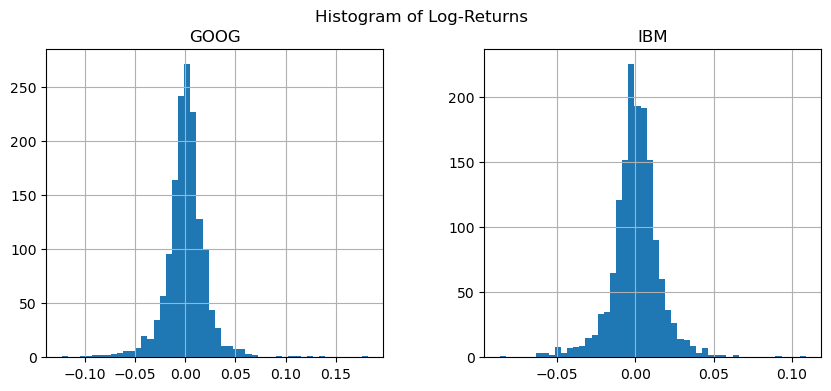

In [25]:
log_returns = np.log(S / S.shift(1)).dropna()
log_returns.hist(bins=50, figsize=(10,4))
plt.suptitle("Histogram of Log-Returns")
plt.show()

The empirical distributions of log-returns show heavy tails
compared to a normal distribution.
This observation motivates the use of Monte Carlo simulation
to study tail risk.

In [22]:
log_returns.describe()

Ticker,GOOG,IBM
count,1509.000000,1509.000000
mean,0.000336,0.000467
std,0.020984,0.015495
min,-0.123401,-0.086419
25%,-0.008940,-0.006826
50%,0.000480,0.000522
75%,0.010098,0.008522
max,0.182251,0.108989


Summary statistics indicate small average daily returns and significant volatility.
These statistics will later be used to calibrate stochastic models.